In [2]:
from google.colab import files
uploaded = files.upload()
df = pd.read_csv("adult 3.csv")

Saving adult 3.csv to adult 3.csv


In [3]:
import pandas as pd
import numpy as np

# View Shape
print("Dataset Shape:", df.shape)

print("Sample Data (First 10 Rows of the original data set):\n")
from tabulate import tabulate

print(tabulate(df.head(10), headers='keys', tablefmt='pretty'))


Dataset Shape: (48842, 15)
Sample Data (First 10 Rows of the original data set):

+---+-----+------------------+--------+--------------+-----------------+--------------------+-------------------+---------------+-------+--------+--------------+--------------+----------------+----------------+--------+
|   | age |    workclass     | fnlwgt |  education   | educational-num |   marital-status   |    occupation     | relationship  | race  | gender | capital-gain | capital-loss | hours-per-week | native-country | income |
+---+-----+------------------+--------+--------------+-----------------+--------------------+-------------------+---------------+-------+--------+--------------+--------------+----------------+----------------+--------+
| 0 | 25  |     Private      | 226802 |     11th     |        7        |   Never-married    | Machine-op-inspct |   Own-child   | Black |  Male  |      0       |      0       |       40       | United-States  | <=50K  |
| 1 | 38  |     Private      | 89814  

In [ ]:
# Class Distribution (Income >50K or <=50K)
print("\nIncome Distribution:\n\n",df['income'].value_counts())



Income Distribution:

 income
<=50K    37155
>50K     11687
Name: count, dtype: int64


In [ ]:
print("Columns and Their Data Types:\n")
for col in df.columns:
    print(f"{col} : {df[col].dtype}")

Columns and Their Data Types:

age : int64
workclass : object
fnlwgt : int64
education : object
educational-num : int64
marital-status : object
occupation : object
relationship : object
race : object
gender : object
capital-gain : int64
capital-loss : int64
hours-per-week : int64
native-country : object
income : object


In [ ]:
print("Missing Values in Each Column (NaN only):\n")
print(df.isnull().sum())


Missing Values in Each Column (NaN only):

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64


In [ ]:
print("Value Counts for All Columns:\n")

for col in df.columns:
    print(f"\n--- {col} ---")
    print(df[col].value_counts())

Value Counts for All Columns:


--- age ---
age
36    1348
35    1337
33    1335
23    1329
31    1325
      ... 
88       6
85       5
87       3
89       2
86       1
Name: count, Length: 74, dtype: int64

--- workclass ---
workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
?                    2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64

--- fnlwgt ---
fnlwgt
203488    21
190290    19
120277    19
125892    18
126569    18
          ..
436163     1
320084     1
125976     1
211349     1
120478     1
Name: count, Length: 28523, dtype: int64

--- education ---
education
HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doct

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
import joblib

# Load data
df = pd.read_csv("adult 3.csv")

# Replace ' ?' with specific values in categorical columns
df['workclass'] = df['workclass'].replace(' ?', 'Other')
df['occupation'] = df['occupation'].replace(' ?', 'Other')
df['native-country'] = df['native-country'].replace(' ?', 'Not Listed')


# Drop unnecessary columns safely
df.drop(columns=['fnlwgt'], inplace=True, errors='ignore')
df.drop(columns=['education'], inplace=True, errors='ignore')

# Convert income to binary
df['income'] = df['income'].apply(lambda x: 1 if x.strip() == '>50K' else 0)

# Label Encoding for specific categorical columns
categorical_cols = ['workclass', 'marital-status', 'occupation',
                    'relationship', 'race', 'gender', 'native-country']

label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Features and Target
X = df.drop('income', axis=1)
y = df['income']

# Scale numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train model
model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight="balanced")
model.fit(X_train, y_train)

# Predictions
preds = model.predict(X_test)
preds_proba = model.predict_proba(X_test)[:, 1]

# Evaluation
print("Accuracy:", accuracy_score(y_test, preds))
print("ROC AUC:", roc_auc_score(y_test, preds_proba))
print("Classification Report:\n", classification_report(y_test, preds))


Accuracy: 0.8543351417750026
ROC AUC: 0.9045566596659874
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.91      0.91      7479
           1       0.70      0.67      0.68      2290

    accuracy                           0.85      9769
   macro avg       0.80      0.79      0.79      9769
weighted avg       0.85      0.85      0.85      9769



In [ ]:
# Save model, scaler, and encoders
joblib.dump(model, "model.pkl")
joblib.dump(scaler, "scaler.pkl")
joblib.dump(label_encoders, "encoders.pkl")

# Download in Colab (optional)
from google.colab import files
files.download("model.pkl")
files.download("scaler.pkl")
files.download("encoders.pkl")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# View Shape
print("Dataset Shape:", df.shape)

print("Sample Data (First 10 Rows) after encoding and processing:\n")
from tabulate import tabulate

print(tabulate(df.head(10), headers='keys', tablefmt='pretty'))


Dataset Shape: (48842, 13)
Sample Data (First 10 Rows) after encoding and processing:

+---+-----+-----------+-----------------+----------------+------------+--------------+------+--------+--------------+--------------+----------------+----------------+--------+
|   | age | workclass | educational-num | marital-status | occupation | relationship | race | gender | capital-gain | capital-loss | hours-per-week | native-country | income |
+---+-----+-----------+-----------------+----------------+------------+--------------+------+--------+--------------+--------------+----------------+----------------+--------+
| 0 | 25  |     4     |        7        |       4        |     7      |      3       |  2   |   1    |      0       |      0       |       40       |       39       |   0    |
| 1 | 38  |     4     |        9        |       2        |     5      |      0       |  4   |   1    |      0       |      0       |       50       |       39       |   0    |
| 2 | 28  |     2     |       12 

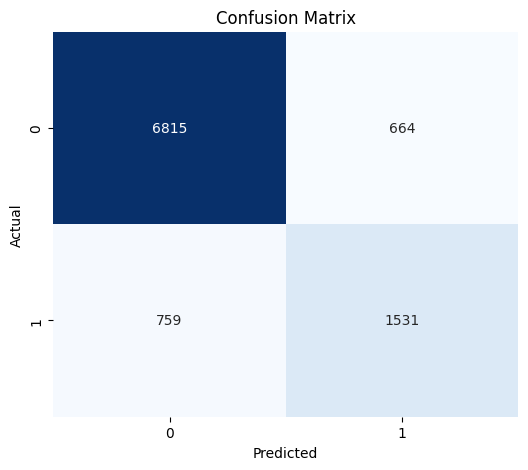

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, precision_recall_curve, auc
# Compute confusion matrix
cm = confusion_matrix(y_test, preds)

# Plot confusion matrix
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

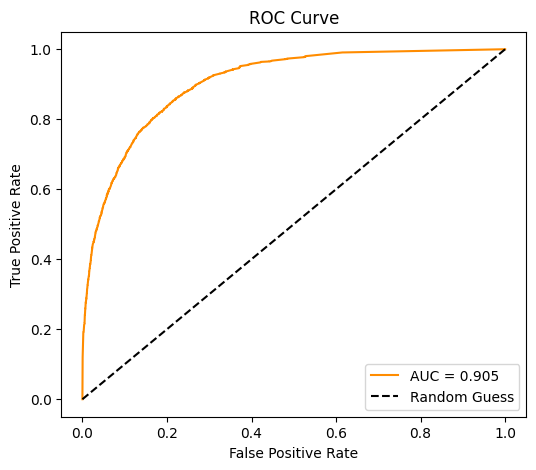

In [ ]:
# Get ROC curve values
fpr, tpr, thresholds = roc_curve(y_test, preds_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.3f}', color='darkorange')
plt.plot([0,1], [0,1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


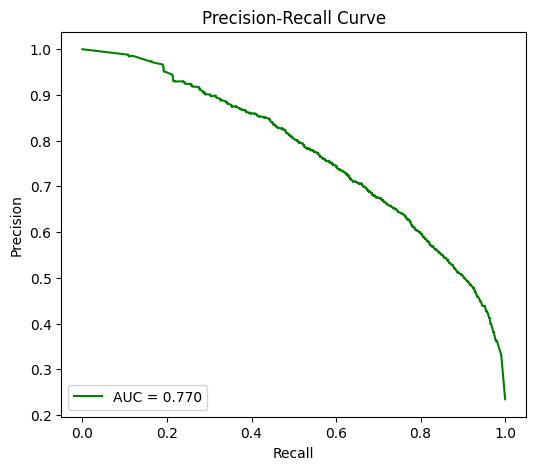

In [ ]:
# Get Precision-Recall curve values
precision, recall, thresholds = precision_recall_curve(y_test, preds_proba)
pr_auc = auc(recall, precision)

# Plot Precision-Recall Curve
plt.figure(figsize=(6,5))
plt.plot(recall, precision, label=f'AUC = {pr_auc:.3f}', color='green')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.show()


/tmp/ipython-input-20-489301300.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feat_importance, palette='Blues_r')


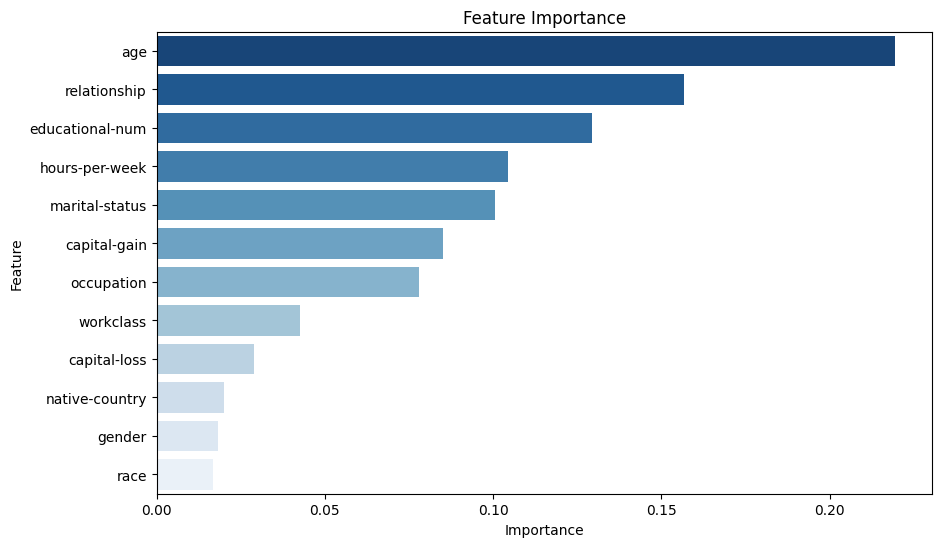

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

feature_names = X.columns
importances = model.feature_importances_

# Create a DataFrame for visualization
feat_importance = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=feat_importance, palette='Blues_r')
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.legend([],[], frameon=False)  # Remove legend
plt.show()


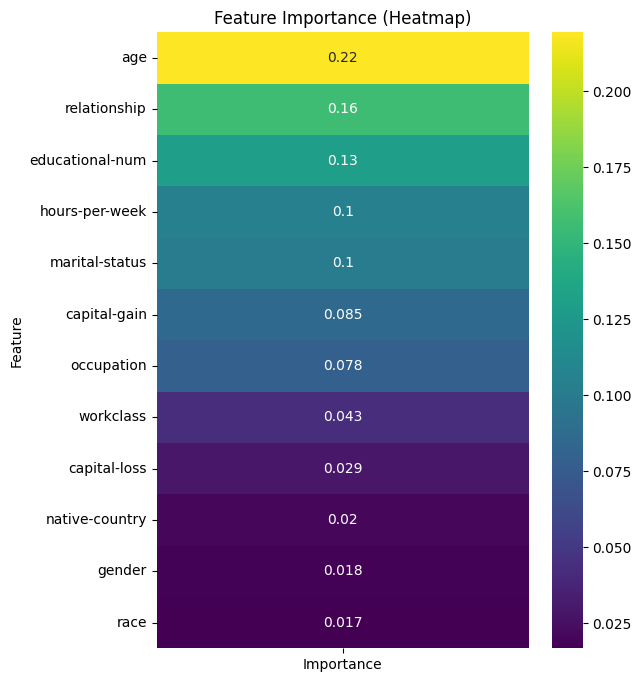

In [ ]:
plt.figure(figsize=(6,8))
sns.heatmap(feat_importance.set_index('Feature'), annot=True, cmap='viridis', cbar=True)
plt.title('Feature Importance (Heatmap)')
plt.show()

